# Goal : OBJECTS RECOGNITION USING SIFT DESCRIPTOR 
## Scale Invariant Feature Transform

In [1]:
import numpy as np
import pandas as pd
import cv2
import os
from matplotlib import pyplot as plt
import utils

## Load and split (50%) datasets 101_ObjectCategories and coil-100 into train and test set

In [2]:
# 101_objectsCategories dataset
train, test, labels = utils.load_dataset_objectCategories("datasets/101_ObjectCategories/")

print("\n")

# coil-100 dataset
_train, _test, _labels = utils.load_dataset_coil("datasets/coil-100/")

101_objectsCategories 9145 images, 102 labels: 4573 train and 4572 test set.


coil-100 7200 images, 100 labels: 3601 train and 3599 test set.


## Our datasets now content images 128X128 grayscales

In [3]:
train.head()

,images,labels
0,"[[0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 1, 2, 2, 2, 2,...",21
1,"[[197, 192, 189, 191, 196, 196, 193, 195, 198,...",75
2,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",6
3,"[[255, 164, 129, 130, 131, 131, 132, 131, 131,...",60
4,"[[39, 32, 47, 47, 51, 41, 36, 38, 54, 64, 64, ...",26


In [4]:
test.head()

,images,labels
4573,"[[194, 180, 179, 178, 181, 181, 178, 179, 181,...",97
4574,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",49
4575,"[[61, 60, 59, 60, 60, 59, 55, 55, 57, 59, 62, ...",3
4576,"[[105, 105, 105, 105, 105, 105, 105, 105, 105,...",6
4577,"[[71, 84, 74, 69, 68, 68, 71, 73, 72, 76, 77, ...",90


In [5]:
print(np.asarray(_train["images"])[0].shape)

(128, 128)


# Extract descriptors and save as pickle and csv file

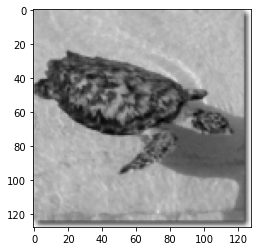

In [6]:
plt.imshow(np.asarray(test["images"])[0],cmap="gray")

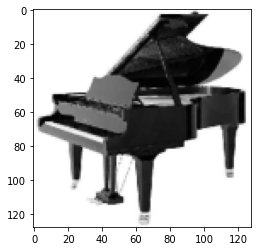

In [7]:
plt.imshow(np.asarray(test["images"])[1],cmap="gray")

In [8]:
import SIFT as sift

In [9]:
sift.compute_sift_on_dataset(data = np.asarray(train).tolist(), labels = labels, save_name = "train_objDB_descriptors")
sift.compute_sift_on_dataset(data = np.asarray(test).tolist(), labels = labels, save_name = "test_objDB_descriptors")

sift.compute_sift_on_dataset(data = np.asarray(_train).tolist(), labels = _labels, save_name = "train_coilDB_descriptors")
sift.compute_sift_on_dataset(data = np.asarray(_test).tolist(), labels = _labels, save_name = "test_coilDB_descriptors")

In [10]:
train["labels"].unique()

array([21, 75, 6, 60, 26, 37, 72, 49, 77, 38, 4, 40, 16, 8, 1, 50, 48, 88,
       70, 93, 54, 71, 24, 7, 52, 25, 27, 99, 3, 83, 82, 74, 90, 0, 39,
       33, 67, 9, 94, 10, 56, 76, 14, 80, 30, 43, 41, 87, 61, 44, 15, 66,
       100, 35, 12, 46, 34, 29, 62, 17, 59, 31, 22, 65, 47, 45, 78, 11,
       19, 64, 97, 92, 36, 55, 18, 23, 96, 91, 2, 32, 73, 58, 101, 51, 86,
       98, 53, 69, 20, 79, 13, 89, 68, 85, 95, 84, 57, 42, 63, 28, 5, 81],
      dtype=object)

In [11]:
len(train["labels"].unique())

102

In [12]:
len(_train["labels"].unique())

100

In [13]:
len(test["labels"].unique())

102

In [14]:
len(_test["labels"].unique())

100

# load descriptor set of train and test set

In [15]:
train_descriptor = pd.read_pickle("data_descriptors/train_objDB_descriptors.pkl")
test_descriptor = pd.read_pickle("data_descriptors/test_objDB_descriptors.pkl")


_train_descriptor = pd.read_pickle("data_descriptors/train_coilDB_descriptors.pkl")
_test_descriptor = pd.read_pickle("data_descriptors/test_coilDB_descriptors.pkl")

In [16]:
train_descriptor.head()

,obj_name,nb_kp,descriptors
0,Leopards,234,"[[26.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 205..."
1,stegosaurus,188,"[[0.0, 0.0, 0.0, 0.0, 5.0, 5.0, 1.0, 2.0, 20.0..."
2,stop_sign,78,"[[0.0, 0.0, 10.0, 23.0, 0.0, 0.0, 0.0, 0.0, 4...."
3,airplanes,133,"[[1.0, 1.0, 6.0, 2.0, 1.0, 2.0, 3.0, 1.0, 134...."
4,car_side,231,"[[0.0, 0.0, 0.0, 15.0, 61.0, 0.0, 0.0, 0.0, 3...."


In [17]:
test_descriptor.head()

,obj_name,nb_kp,descriptors
0,hawksbill,158,"[[21.0, 12.0, 47.0, 55.0, 3.0, 0.0, 1.0, 19.0,..."
1,grand_piano,100,"[[0.0, 0.0, 13.0, 21.0, 0.0, 0.0, 0.0, 0.0, 0...."
2,Faces,108,"[[0.0, 0.0, 0.0, 0.0, 0.0, 40.0, 28.0, 0.0, 11..."
3,stop_sign,72,"[[8.0, 60.0, 2.0, 0.0, 0.0, 33.0, 74.0, 5.0, 2..."
4,sunflower,226,"[[23.0, 92.0, 28.0, 36.0, 64.0, 4.0, 0.0, 0.0,..."


In [18]:
_train_descriptor.head()

,obj_name,nb_kp,descriptors
0,obj2,9,"[[0.0, 0.0, 0.0, 2.0, 1.0, 2.0, 53.0, 20.0, 5...."
1,obj45,179,"[[3.0, 9.0, 0.0, 2.0, 74.0, 118.0, 0.0, 0.0, 7..."
2,obj30,213,"[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 3.0,..."
3,obj16,391,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 134...."
4,obj65,162,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 92.0..."


In [19]:
_test_descriptor.head()

,obj_name,nb_kp,descriptors
0,obj66,366,"[[0.0, 0.0, 3.0, 18.0, 35.0, 14.0, 4.0, 1.0, 2..."
1,obj63,6,"[[0.0, 0.0, 0.0, 4.0, 59.0, 30.0, 5.0, 3.0, 8...."
2,obj67,325,"[[11.0, 76.0, 43.0, 0.0, 0.0, 4.0, 5.0, 7.0, 9..."
3,obj84,103,"[[14.0, 1.0, 1.0, 14.0, 46.0, 7.0, 0.0, 3.0, 1..."
4,obj41,293,"[[5.0, 33.0, 102.0, 12.0, 0.0, 0.0, 0.0, 1.0, ..."


# Match test set descriptors on train set descriptors

In [ ]:
# 101_OjectsCategories dataset
match_list = sift.match_test_train(test_set = test_descriptor["descriptors"].values.tolist(), train_set = train_descriptor["descriptors"].values.tolist(), save_name = "match_test_train_dbOjtCat")

1
2
3
4


In [ ]:
# coil-100 dataset 
#_match_list = sift.match_test_train_threading(test_set = _test_descriptor["descriptors"].values.tolist(), train_set = _train_descriptor["descriptors"].values.tolist(), save_name = "match_test_train_dbCoil_100")

In [ ]:
# save results
#save = np.savetxt("macth_descriptor/list_tab_ratio", match_list)

import pickle

pickle.dump(match_list, open( "macth_descriptor/save.p", "wb" ))

#match_list = pickle.load(open("macth_descriptor/save.p", "rb" ))

import joblib
joblib.dump(match_list, "macth_descriptor/list_tab_ratio_bis" )

In [ ]:
# evaluate 
list_scores = sift.evaluate_matching(match_list, train_descriptor["descriptors"].values.tolist())

In [ ]:
list_scores

In [ ]:
# predict
list_labels =  np.loadtxt('data/101_ObjectCategories/labels.txt', dtype=np.str)
list_labels = list_labels.tolist()

list_pred =  sift.predict(list_scores, list_labels, train["labels"].values.tolist())

In [ ]:
list_pred

In [ ]:
test["labels"].values.tolist()

In [ ]:
len(list_labels)

In [ ]:
# Compute and draw confusion metric


sift.confusion_matrix(predict_labels = list_pred, true_labels = test["labels"].values.tolist(), labels = list_labels)